# Plot cpdb results
# 6 Dec 2021 Chenqu

In [17]:
import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
import seaborn as sb
from itertools import compress
import random
import joblib as jl
import matplotlib.patches as mpatches
import os as os

sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf')
plt.rcParams["figure.figsize"] = [6,6]
#plt.rcParams['font.sans-serif']=['Arial']
#rc('font', **{'family':'sans-serif', 'sans-serif':['Arial']})
#plt.rcParams['pdf.fonttype'] = 'truetype'

In [18]:
sb.set_palette('tab10')

In [19]:
# import utils
import sys
sys.path.append('/home/jovyan/chenqu_utils')
from array_operations import *
sys.path.append('/home/jovyan/thymusatlas/')
import scjp
from scjp import model

In [20]:
organ_order = ['YS','LI','BM','TH','SP','MLN','SK','GU','KI']

In [21]:
# set working directory
%cd /home/jovyan/panfetal/

/home/jovyan/panfetal


In [40]:
# figure directory
fig_path = '/home/jovyan/mount/gdrive/Pan_fetal/plots_output/chenqu_jhub/'
sc.settings.figdir = fig_path

# B_progenitor spatial cpdb results 

In [27]:
cpdb_df = pd.read_csv('csv/B_prog_cpdb_all.csv')

In [29]:
cpdb_df = cpdb_df.iloc[:,[0,1,4,7, 2, 5, 8, 3,6,9]]

In [30]:
cpdb_df

,ligand_pair,LI-ILC3,SP-ILC3,TH-ILC3,LI-MACROPHAGE_LYVE1_HIGH,SP-MACROPHAGE_LYVE1_HIGH,TH-MACROPHAGE_LYVE1_HIGH,LI-NK,SP-NK,TH-NK
0,a4b1 complex_PLAUR,0.0000,0.0000,0.0000,1.3028,0.9442,1.5164,0.0000,0.0000,0.0000
1,a4b1 complex_SPP1,0.0000,0.0000,0.0000,2.2508,1.6656,1.6788,0.0000,0.0000,0.0000
2,ALOX5_ALOX5AP,0.6220,0.3216,1.0460,0.4916,0.2998,1.0456,1.9968,1.7670,1.5524
3,APP_CD74,0.4108,0.0000,1.7104,2.6604,3.0298,3.2344,0.0000,0.0000,1.6434
4,BAG6_NCR3,1.0186,0.9112,1.0150,0.0000,0.0000,0.0000,1.3210,1.2834,1.0262
...,...,...,...,...,...,...,...,...,...,...
56,TNFRSF14_LTA,1.2610,1.2978,1.0228,0.0000,0.0000,0.0000,0.6466,0.0000,0.4676
57,TNFRSF14_TNFSF14,0.7650,0.9998,0.6650,0.0000,0.0000,0.0000,1.2302,1.2312,1.1166
58,TNFRSF1A_GRN,0.0000,0.0000,0.0000,1.5382,1.3798,1.7390,0.0000,0.0000,0.0000
59,TNFRSF1A_TNF,0.1964,0.2008,0.0000,0.7552,0.0000,1.0662,0.1960,0.0000,0.0000


In [31]:
cpdb_df.index = cpdb_df['ligand_pair']
cpdb_df = cpdb_df.drop(['ligand_pair'], 1)

## Cluster genes
from scipy.cluster.hierarchy import ward, dendrogram, leaves_list
clustering = ward(cpdb_df.values)
ordered_genes = cpdb_df.index[leaves_list(clustering)].tolist()
# X_pl_df = X_pl_df[ordered_genes + ['n_cells', 'organ', 'age_bins'] ]
ordered_genes = np.array(ordered_genes)

In [32]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


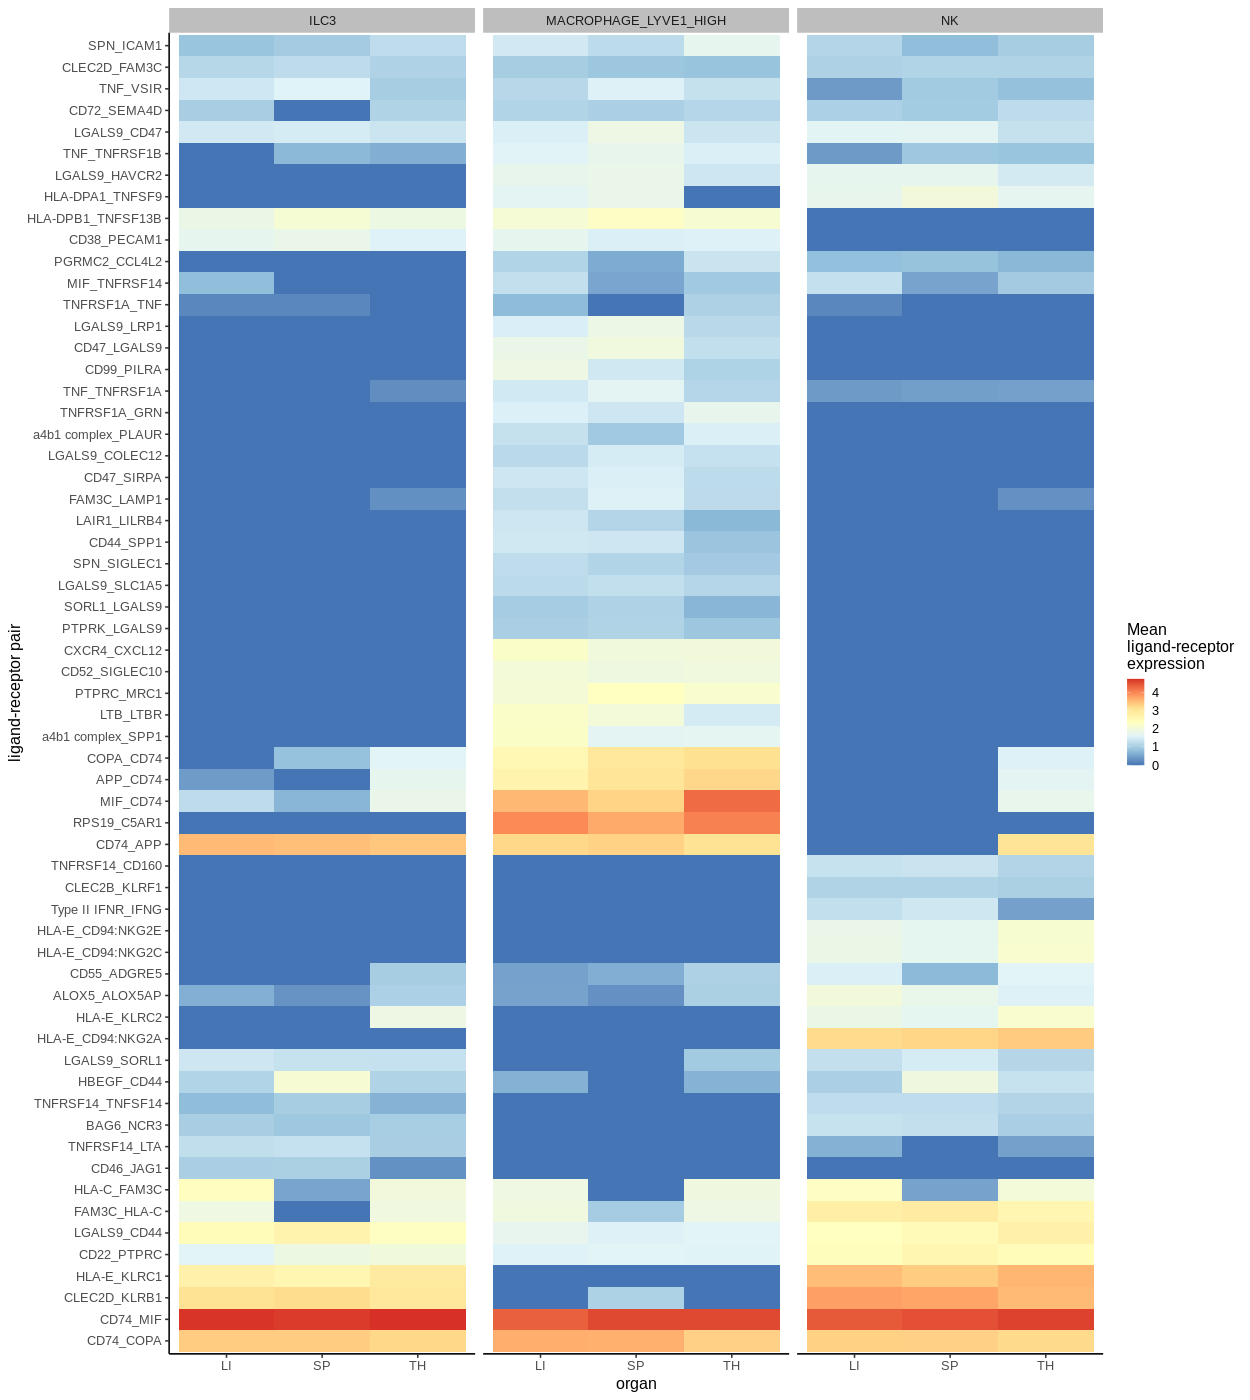

In [41]:
%%R -i cpdb_df -i ordered_genes -w 1250 -h 1400
library("dplyr") 
library('tidyr')
library('tidyverse')
library("ggplot2") 
cpdb_df %>%
    rownames_to_column('ligand_pair') %>%
    pivot_longer(cols=-c('ligand_pair'), names_to='celltype', values_to='mean_of_means') %>%
    separate('celltype', into=c("organ", 'celltype_pair'), sep='-') %>%
    mutate(ligand_pair=factor(ligand_pair, levels=ordered_genes)) %>%
    mutate(celltype_pair = str_replace(celltype_pair, '\\.', '\n')) %>%
    ggplot(aes(organ, ligand_pair, fill=mean_of_means)) +
    geom_tile() +
    facet_grid(.~celltype_pair) +
    scale_fill_distiller(palette="RdYlBu", name='Mean\nligand-receptor\nexpression') +
    ylab("ligand-receptor pair") +
    theme_classic(base_size=16) +
    theme(strip.background=element_rect(fill='grey', color=NA)) +
    ggsave('/home/jovyan/mount/gdrive/Pan_fetal/plots_output/chenqu_jhub/B_prog_cpdb_plot.pdf', width=12.5, height=14)